# Analysis of Trial Data

Using annalysis.py, and previous nb, analyze the following:
1. Network weight convergence
2. Performance of PIDNN against baseline P controller (animation)
3. Mean cross-track error (XTE) for each set of test parameters for both controllers.

In [2]:
%matplotlib inline
## matplotlib notebook interacts negatively with imagemagick GIF writer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import annalysis as ann

mpl.style.use('mitch-exp')

## Load Data

Load three batches:
- 200 trials of GPID tuning with random ICs
- 50 trials of GPID, P, and PID controllers with random ICs
- 20 structured trials with GPID, PID, P controllers

In [3]:
import os

In [13]:
# load all trial batches
trialsets = []  # batch number, ctype [0, 1], trial num, tuple of name and data

batch_name = ['data 05_07_t' + str(i) for i in [3, 5, 6]]

for i, nm in enumerate(batch_name):
#     P_trials = []
#     GPID_trials = []
    fnames = [fn for fn in os.listdir(nm) if 'out' in fn]
    GPID_trials = [None]*len(fnames)
    P_trials = [None]*len(fnames)
    for fn in fnames:
        if 'P_' in fn:
            num = int(fn.split('_')[2])
#             P_trials.append((fn, ann.load_data_from_fname(nm + '/' + fn)))
            P_trials[num - 1] = (fn, ann.load_data_from_fname(nm + '/' + fn))
        elif 'GPID_' in fn:
            num = int(fn.split('_')[2])
#             GPID_trials.append((fn, ann.load_data_from_fname(nm + '/' + fn)))
            GPID_trials[num - 1] = (fn, ann.load_data_from_fname(nm + '/' + fn))
    trialsets.append([P_trials, GPID_trials])

In [1]:
# trialsets

In [5]:
# Box plot of ctes
tset = 1

P_ctes = np.zeros(len(trialsets[tset][0]))
GPID_ctes = np.zeros(len(trialsets[tset][0]))

for k in range(len(trialsets[tset][0])):  # P trials
    P_ctes[k] = ann.straight_mean_cte(trialsets[tset][0][k][1][0], 
                                      trialsets[tset][0][k][1][1])

for k in range(len(trialsets[tset][1])):  # GPID trials
    GPID_ctes[k] = ann.straight_mean_cte(trialsets[tset][1][k][1][0],
                                         trialsets[tset][1][k][1][1])

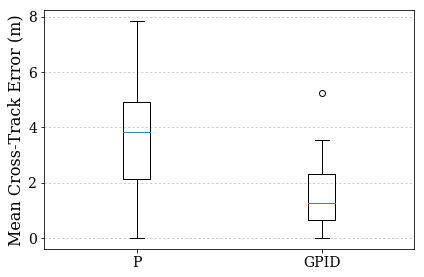

In [9]:
plt.figure(figsize=(6, 4))
plt.boxplot([P_ctes[np.isfinite(P_ctes)], 
             GPID_ctes], labels=['P', 'GPID'])
plt.ylabel('Mean Cross-Track Error (m)')

plt.gca().xaxis.grid(False)

plt.tight_layout()
# plt.savefig('fig/.pdf')

Compare all GPIDs

In [51]:
# Box plot of ctes

b1 = np.zeros(50)
b2 = np.zeros(50)
b3 = np.zeros(50)

for k in range(50):  # GPID trials
    b1[k] = ann.straight_mean_cte(trialsets[0][1][k][1][0],
                                  trialsets[0][1][k][1][1])
for k in range(50):  # GPID trials
    b2[k] = ann.straight_mean_cte(trialsets[1][1][k][1][0],
                                  trialsets[1][1][k][1][1])
for k in range(50):  # GPID trials
    b3[k] = ann.straight_mean_cte(trialsets[2][1][k][1][0],
                                  trialsets[2][1][k][1][1])

In [60]:
allem = np.array([b1, b2, b3])

In [61]:
allem.shape

(3, 50)

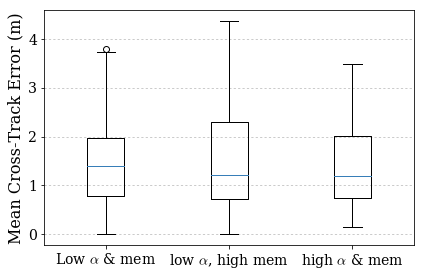

In [66]:
plt.figure(figsize=(6, 4))
plt.boxplot(allem.T, labels=[r'Low $\alpha$ & mem', r'low $\alpha$, high mem', r'high $\alpha$ & mem'])
plt.ylabel('Mean Cross-Track Error (m)')

plt.gca().xaxis.grid(False)

plt.tight_layout()
plt.savefig('fig/gpid_param.pdf')

## Network Weight Progression

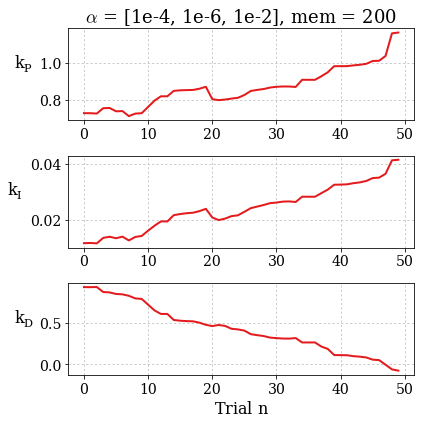

In [47]:
wtsdf, wts_smooth = ann.plot_weights([trialsets[1][1][i][1][0] for i in range(len(trialsets[2][1]))],
                                     [trialsets[1][1][i][1][1] for i in range(len(trialsets[2][1]))],
                                     window=1, title=r'$\alpha$ = [1e-4, 1e-6, 1e-2], mem = 200')
plt.savefig('fig/weight_05_07_t5.pdf')

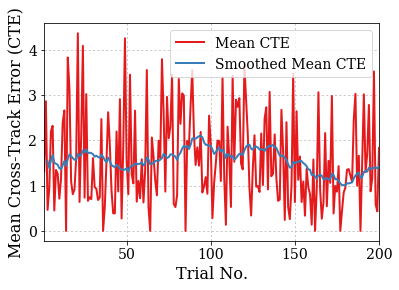

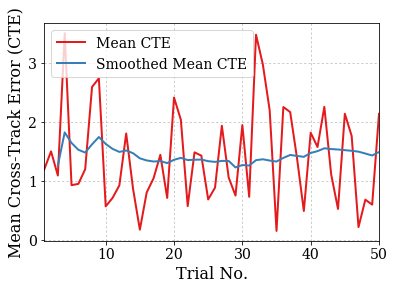

In [28]:
ctedf = ann.plot_cte([trialsets[1][1][i][1][0] for i in range(len(trialsets[1][1]))],
                     [trialsets[1][1][i][1][1] for i in range(len(trialsets[1][1]))], window=25)

ctedf3 = ann.plot_cte([trialsets[2][1][i][1][0] for i in range(len(trialsets[2][1]))],
                     [trialsets[2][1][i][1][1] for i in range(len(trialsets[2][1]))], window=25)


# Trial 5

data 05_07_t5

In [32]:
reload(ann)

<module 'annalysis' from 'annalysis.py'>

## Nice sample trial plots

NameError: name 'trialsets' is not defined

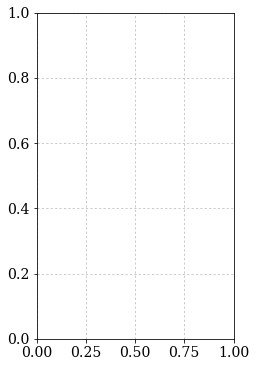

In [7]:
plt.figure(figsize=(12, 6))

tr1 = 2
ax1 = plt.subplot(131)
ann.view_trial(trialsets[0][1][tr1][1][0], trialsets[0][1][tr1][1][1], 
               ax1, scat=True, label='GPID Controller', leg=True, ls='--')
ann.view_trial(trialsets[0][0][tr1][1][0], trialsets[0][0][tr1][1][1],
               ax1, label='P Controller', path=False)
ax1.legend(fontsize=15)
s = '$E_{MCTE, GPID} = $ %.2f \n $E_{MCTE, P} = $ %.2f' % (ann.straight_mean_cte(trialsets[0][1][tr1][1][0], 
                                                                                 trialsets[0][1][tr1][1][1]),
                                                           ann.straight_mean_cte(trialsets[0][0][tr1][1][0], 
                                                                                 trialsets[0][0][tr1][1][1]))
ax1.text(5, -45, s, fontsize=18)

tr2 = 11
ax2 = plt.subplot(132)
ann.view_trial(trialsets[0][1][tr2][1][0], trialsets[0][1][tr2][1][1], 
               ax2, scat=True, label='GPID Controller', ls='--')
ann.view_trial(trialsets[0][0][tr2][1][0], trialsets[0][0][tr2][1][1],
               ax2, label='P Controller', path=False)
s = '$E_{MCTE, GPID} = $ %.2f \n $E_{MCTE, P} = $ %.2f' % (ann.straight_mean_cte(trialsets[0][1][tr2][1][0], 
                                                                                 trialsets[0][1][tr2][1][1]),
                                                           ann.straight_mean_cte(trialsets[0][0][tr2][1][0], 
                                                                                 trialsets[0][0][tr2][1][1]))
ax2.text(-2, 42, s, fontsize=18)


tr3 = 18
ax3 = plt.subplot(133)
ann.view_trial(trialsets[0][1][tr3][1][0], trialsets[0][1][tr3][1][1], 
               ax3, scat=True, label='GPID Controller', ls='--')
ann.view_trial(trialsets[0][0][tr3][1][0], trialsets[0][0][tr3][1][1],
               ax3, label='P Controller', path=False)
s = '$E_{MCTE, GPID} = $ %.2f \n $E_{MCTE, P} = $ %.2f' % (ann.straight_mean_cte(trialsets[0][1][tr3][1][0], 
                                                                                 trialsets[0][1][tr3][1][1]),
                                                           ann.straight_mean_cte(trialsets[0][0][tr3][1][0], 
                                                                                 trialsets[0][0][tr3][1][1]))
ax3.text(-4, -20, s, fontsize=18)

plt.tight_layout()
# plt.savefig('fig/sample_trials.pdf')

## Structured Trial Results

Load the structured trials.

In [4]:
# load all trial batches
str_trials = []  # batch number, ctype [0, 1], trial num, tuple of name and data

batch_name = ['data 05_07_t' + str(i) for i in [7]]

for i, nm in enumerate(batch_name):
#     P_trials = []
#     GPID_trials = []
    fnames = [fn for fn in os.listdir(nm) if 'out' in fn]
    GPID_trials = [None]*len(fnames)
    P_trials = [None]*len(fnames)
    for fn in fnames:
        if 'P_' in fn:
            num = int(fn.split('_')[2])
#             P_trials.append((fn, ann.load_data_from_fname(nm + '/' + fn)))
            P_trials[num - 1] = (fn, ann.load_data_from_fname(nm + '/' + fn))
        elif 'GPID_' in fn:
            num = int(fn.split('_')[2])
#             GPID_trials.append((fn, ann.load_data_from_fname(nm + '/' + fn)))
            GPID_trials[num - 1] = (fn, ann.load_data_from_fname(nm + '/' + fn))
    str_trials.append([P_trials, GPID_trials])

This data has broken csv headers, we will need to move the columns around

In [14]:
for i in range(15):
    str_trials[0][0][i][1][0]['em_x'] = str_trials[0][0][i][1][0]['wt6']
    str_trials[0][0][i][1][0]['em_y'] = str_trials[0][0][i][1][0]['wt7']

In [16]:
for i in range(15):
    str_trials[0][1][i][1][0]['em_x'] = str_trials[0][1][i][1][0]['wt6']
    str_trials[0][1][i][1][0]['em_y'] = str_trials[0][1][i][1][0]['wt7']

In [17]:
str_trials[0][1][0][1][0].head()

,t,u,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,r,y,em_x,em_y,Unnamed: 15
0,0.0,-0.7854,0.7,0.01,1.0,0.78540,3.1416,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
1,0.2,-0.7854,0.7,0.01,1.0,0.78529,3.1416,-0.001500,3.074600e-09,NaN,NaN,NaN,NaN,-0.001500,3.074600e-09,NaN
2,0.4,-0.7854,0.7,0.01,1.0,0.78497,3.1415,-0.005997,1.536800e-07,NaN,NaN,NaN,NaN,-0.005997,1.536800e-07,NaN
3,0.6,-0.7854,0.7,0.01,1.0,0.78444,3.1413,-0.013486,1.425900e-06,NaN,NaN,NaN,NaN,-0.013486,1.425900e-06,NaN
4,0.8,-0.7854,0.7,0.01,1.0,0.78370,3.1408,-0.023957,6.729700e-06,NaN,NaN,NaN,NaN,-0.023957,6.729700e-06,NaN


In [18]:
str_trials[0][0][0][1][0].head()

,t,u,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,r,y,em_x,em_y,Unnamed: 15
0,0.0,-0.47124,0.7,0.01,1.0,0.78540,3.1416,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
1,0.2,-0.47126,0.7,0.01,1.0,0.78529,3.1416,-0.001500,1.597000e-09,NaN,NaN,NaN,NaN,-0.001500,1.597000e-09,NaN
2,0.4,-0.47132,0.7,0.01,1.0,0.78497,3.1416,-0.005997,7.982600e-08,NaN,NaN,NaN,NaN,-0.005997,7.982600e-08,NaN
3,0.6,-0.47140,0.7,0.01,1.0,0.78444,3.1414,-0.013486,7.407200e-07,NaN,NaN,NaN,NaN,-0.013486,7.407200e-07,NaN
4,0.8,-0.47150,0.7,0.01,1.0,0.78370,3.1412,-0.023957,3.496400e-06,NaN,NaN,NaN,NaN,-0.023957,3.496400e-06,NaN


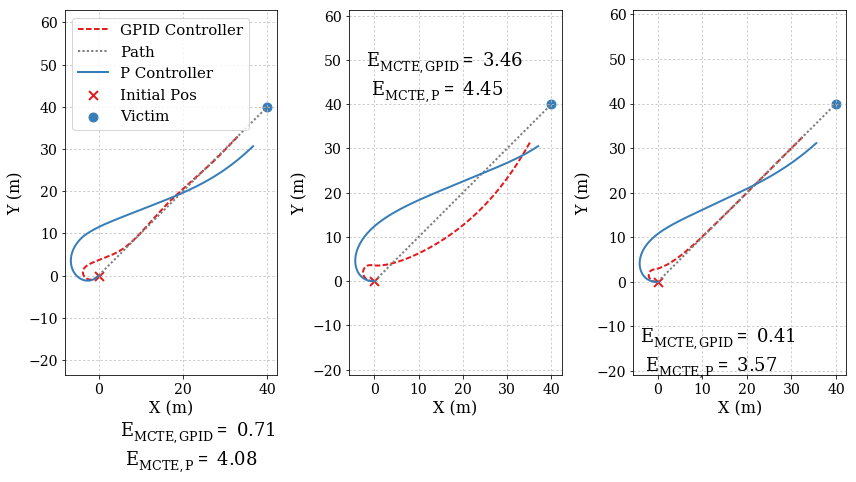

In [21]:
plt.figure(figsize=(12, 6))

tr1 = 2
ax1 = plt.subplot(131)
ann.view_trial(str_trials[0][1][tr1][1][0], str_trials[0][1][tr1][1][1], 
               ax1, scat=True, label='GPID Controller', leg=True, ls='--')
ann.view_trial(str_trials[0][0][tr1][1][0], str_trials[0][0][tr1][1][1],
               ax1, label='P Controller', path=False)
ax1.legend(fontsize=15)
s = '$E_{MCTE, GPID} = $ %.2f \n $E_{MCTE, P} = $ %.2f' % (ann.straight_mean_cte(str_trials[0][1][tr1][1][0], 
                                                                                 str_trials[0][1][tr1][1][1]),
                                                           ann.straight_mean_cte(str_trials[0][0][tr1][1][0], 
                                                                                 str_trials[0][0][tr1][1][1]))
ax1.text(5, -45, s, fontsize=18)

tr2 = 11
ax2 = plt.subplot(132)
ann.view_trial(str_trials[0][1][tr2][1][0], str_trials[0][1][tr2][1][1], 
               ax2, scat=True, label='GPID Controller', ls='--')
ann.view_trial(str_trials[0][0][tr2][1][0], str_trials[0][0][tr2][1][1],
               ax2, label='P Controller', path=False)
s = '$E_{MCTE, GPID} = $ %.2f \n $E_{MCTE, P} = $ %.2f' % (ann.straight_mean_cte(str_trials[0][1][tr2][1][0], 
                                                                                 str_trials[0][1][tr2][1][1]),
                                                           ann.straight_mean_cte(str_trials[0][0][tr2][1][0], 
                                                                                 str_trials[0][0][tr2][1][1]))
ax2.text(-2, 42, s, fontsize=18)


tr3 = 14
ax3 = plt.subplot(133)
ann.view_trial(str_trials[0][1][tr3][1][0], str_trials[0][1][tr3][1][1], 
               ax3, scat=True, label='GPID Controller', ls='--')
ann.view_trial(str_trials[0][0][tr3][1][0], str_trials[0][0][tr3][1][1],
               ax3, label='P Controller', path=False)
s = '$E_{MCTE, GPID} = $ %.2f \n $E_{MCTE, P} = $ %.2f' % (ann.straight_mean_cte(str_trials[0][1][tr3][1][0], 
                                                                                 str_trials[0][1][tr3][1][1]),
                                                           ann.straight_mean_cte(str_trials[0][0][tr3][1][0], 
                                                                                 str_trials[0][0][tr3][1][1]))
ax3.text(-4, -20, s, fontsize=18)

plt.tight_layout()
# plt.savefig('fig/sample_trials2.pdf')

In [23]:
for i in range(15):
    print('Trial %i: P: %.3f, GPID: %.3f' % (i, ann.straight_mean_cte(str_trials[0][0][i][1][0], 
                                                                      str_trials[0][0][i][1][1]),
                                             ann.straight_mean_cte(str_trials[0][1][i][1][0], 
                                                                   str_trials[0][1][i][1][1])))

Trial 0: P: 4.248, GPID: 0.980
Trial 1: P: 4.062, GPID: 0.653
Trial 2: P: 4.075, GPID: 0.705
Trial 3: P: 5.439, GPID: 1.142
Trial 4: P: 3.266, GPID: 0.386
Trial 5: P: 10.405, GPID: 7.426
Trial 6: P: 3.616, GPID: 0.366
Trial 7: P: 5.955, GPID: 1.507
Trial 8: P: 45.437, GPID: 39.405
Trial 9: P: 8.055, GPID: 0.524
Trial 10: P: 4.371, GPID: 1.998
Trial 11: P: 4.446, GPID: 3.463
Trial 12: P: 4.423, GPID: 2.322
Trial 13: P: 4.944, GPID: 1.144
Trial 14: P: 3.573, GPID: 0.409


In [24]:
for i in range(15):
    print(i, str_trials[0][1][i][0])

(0, 'GPID_trial_001_out_05-08-17_01-54-14.csv')
(1, 'GPID_trial_002_out_05-08-17_01-56-02.csv')
(2, 'GPID_trial_003_out_05-08-17_01-56-22.csv')
(3, 'GPID_trial_004_out_05-08-17_01-56-42.csv')
(4, 'GPID_trial_005_out_05-08-17_01-56-54.csv')
(5, 'GPID_trial_006_out_05-08-17_01-57-32.csv')
(6, 'GPID_trial_007_out_05-08-17_01-58-06.csv')
(7, 'GPID_trial_008_out_05-08-17_01-58-45.csv')
(8, 'GPID_trial_009_out_05-08-17_01-58-53.csv')
(9, 'GPID_trial_010_out_05-08-17_01-59-31.csv')
(10, 'GPID_trial_011_out_05-08-17_02-00-08.csv')
(11, 'GPID_trial_012_out_05-08-17_02-00-27.csv')
(12, 'GPID_trial_013_out_05-08-17_02-00-45.csv')
(13, 'GPID_trial_014_out_05-08-17_02-01-04.csv')
(14, 'GPID_trial_015_out_05-08-17_02-01-31.csv')


In [27]:
# for LaTeX
for i in range(15):
    print('Trial %i: %.3f & %.3f' % (i+1, ann.straight_mean_cte(str_trials[0][0][i][1][0], 
                                                                      str_trials[0][0][i][1][1]),
                                             ann.straight_mean_cte(str_trials[0][1][i][1][0], 
                                                                   str_trials[0][1][i][1][1])))

Trial 1: 4.248 & 0.980
Trial 2: 4.062 & 0.653
Trial 3: 4.075 & 0.705
Trial 4: 5.439 & 1.142
Trial 5: 3.266 & 0.386
Trial 6: 10.405 & 7.426
Trial 7: 3.616 & 0.366
Trial 8: 5.955 & 1.507
Trial 9: 45.437 & 39.405
Trial 10: 8.055 & 0.524
Trial 11: 4.371 & 1.998
Trial 12: 4.446 & 3.463
Trial 13: 4.423 & 2.322
Trial 14: 4.944 & 1.144
Trial 15: 3.573 & 0.409


In [28]:
a = []
b = []

# for LaTeX
for i in range(15):
    a.append(ann.straight_mean_cte(str_trials[0][0][i][1][0], 
                                   str_trials[0][0][i][1][1]))
    b.append(ann.straight_mean_cte(str_trials[0][1][i][1][0], 
                                   str_trials[0][1][i][1][1]))

In [31]:
np.mean(a), np.mean(b)

(7.7543633151595435, 4.1620643540169882)

In [33]:
Pcte = np.array(a)
Gcte = np.array(b)

{'boxes': [<matplotlib.lines.Line2D at 0x11a85dc90>,
 'caps': [<matplotlib.lines.Line2D at 0x11a851b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ac4aa10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a851410>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11a85da50>,
  <matplotlib.lines.Line2D at 0x11a76ff50>]}

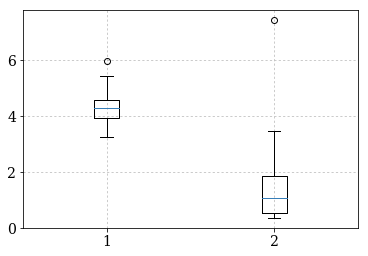

In [34]:
plt.boxplot([Pcte[Pcte<8], Gcte[Gcte<8]])